<a href="https://colab.research.google.com/github/BarbosaRicardo/Assignment-1/blob/master/Copy_of_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparation
##### Import all of the necessary libraries and the file has been loaded from Github

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read csv file

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/BarbosaRicardo/iot-lab1/main/iot_telemetry_data%202.csv")
df.head()


,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


Dropped columns with NaN 

In [ ]:
df = df.dropna('columns') # drop columns with NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


Inspected the data using info() to look at the dataframe columns and types 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


Replaced the timestamp with a more readable condition

In [ ]:
df['time_stamp'] = pd.to_datetime(df['ts'], unit='s')
df.drop(columns=['ts'], inplace=True) 
df.head()

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-07-12 00:01:34.385974528
1,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-07-12 00:01:34.735567616
2,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-07-12 00:01:38.073572864
3,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-07-12 00:01:39.589145856
4,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-07-12 00:01:41.761234944


Inspected the data with a heatmap to see correlations with feature columns

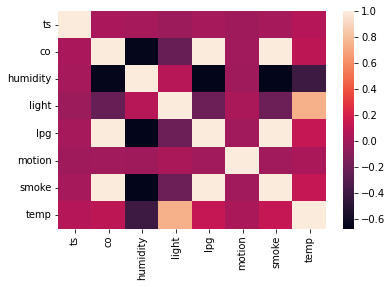

In [ ]:
sns.heatmap(df.corr()) 

Utilized one hot encoding to simplify the names of the devices being used. 

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
Devices = labelencoder.fit_transform(df['device'])
Light = labelencoder.fit_transform(df['light'])
Motion = labelencoder.fit_transform(df['motion'])

onehotencoder=OneHotEncoder()

In [ ]:
df['device'] = Devices
df['light'] = Light
df['motion'] = Motion
df

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-07-12 00:01:34.385974528
1,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-07-12 00:01:34.735567616
2,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-07-12 00:01:38.073572864
3,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-07-12 00:01:39.589145856
4,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-07-12 00:01:41.761234944
...,...,...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-07-20 00:03:33.162014976
405180,2,0.005882,48.500000,0,0.008660,0,0.023301,22.200000,2020-07-20 00:03:33.576560640
405181,1,0.004540,75.699997,1,0.007181,0,0.019076,26.600000,2020-07-20 00:03:36.167959296
405182,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-07-20 00:03:36.979521536


Double checked values to see if any have null values 

In [ ]:
df.isnull().sum()

device        0
co            0
humidity      0
light         0
lpg           0
motion        0
smoke         0
temp          0
time_stamp    0
dtype: int64

Converted celsius to Fahrenheit for easier readability. 

In [ ]:
df['temp'] = (df['temp'] * 1.8) + 32
df

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,72.860000,2020-07-12 00:01:34.385974528
1,0,0.002840,76.000000,0,0.005114,0,0.013275,67.460001,2020-07-12 00:01:34.735567616
2,2,0.004976,50.900000,0,0.007673,0,0.020475,72.680000,2020-07-12 00:01:38.073572864
3,1,0.004403,76.800003,1,0.007023,0,0.018628,80.600000,2020-07-12 00:01:39.589145856
4,2,0.004967,50.900000,0,0.007664,0,0.020448,72.680000,2020-07-12 00:01:41.761234944
...,...,...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0,0.016437,66.560001,2020-07-20 00:03:33.162014976
405180,2,0.005882,48.500000,0,0.008660,0,0.023301,71.960000,2020-07-20 00:03:33.576560640
405181,1,0.004540,75.699997,1,0.007181,0,0.019076,79.880001,2020-07-20 00:03:36.167959296
405182,0,0.003745,75.300003,0,0.006247,0,0.016437,66.560001,2020-07-20 00:03:36.979521536


Plotting the graphs 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f176dd47310>,
      dtype=object)

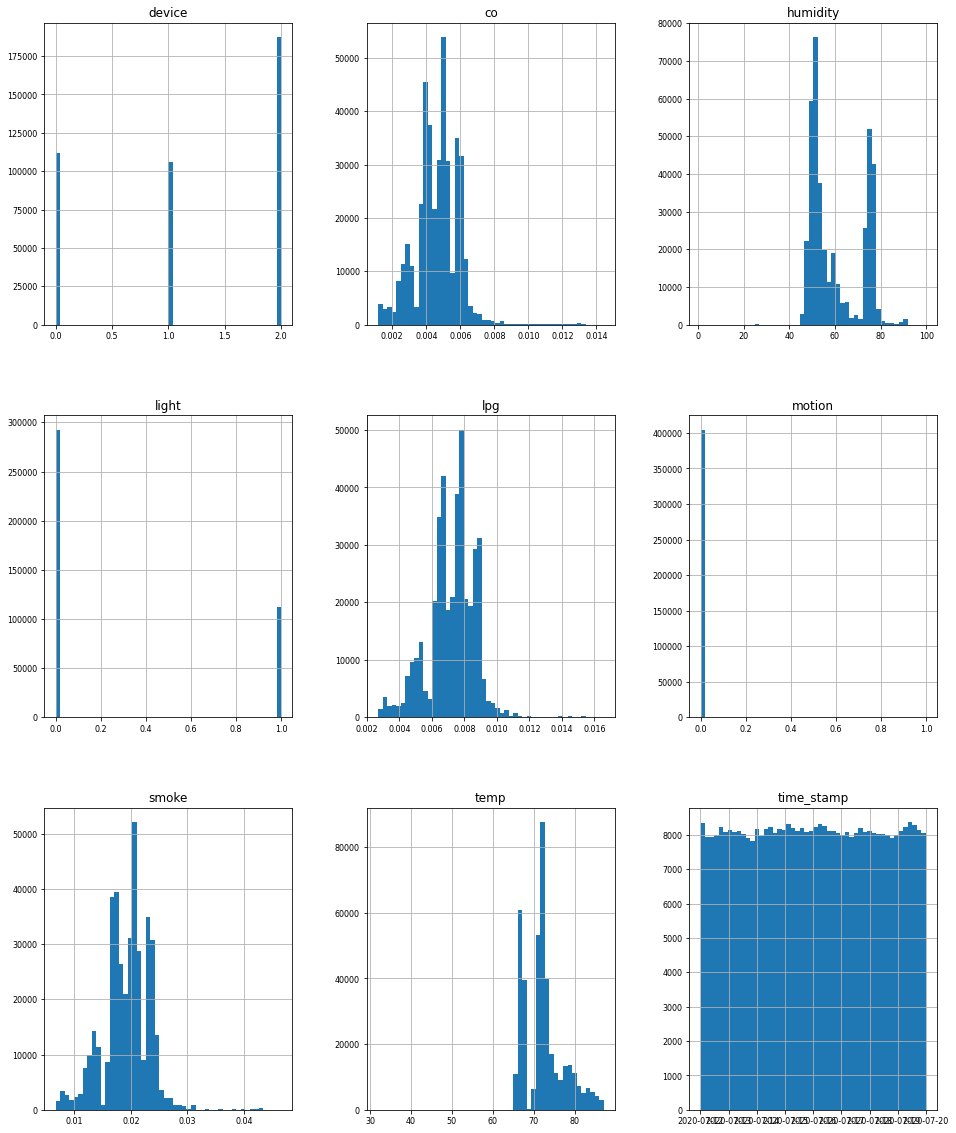

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)